## Open 3D

In [1]:
pip install open3d

Note: you may need to restart the kernel to use updated packages.


In [53]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import open3d_tutorial as o3dtut

ModuleNotFoundError: No module named 'open3d_tutorial'

In [16]:
pcd = o3d.io.read_point_cloud("fragment.ply")
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd])

PointCloud with 196133 points.
[[0.65234375 0.84686458 2.37890625]
 [0.65234375 0.83984375 2.38430572]
 [0.66737998 0.83984375 2.37890625]
 ...
 [2.00839925 2.39453125 1.88671875]
 [2.00390625 2.39488506 1.88671875]
 [2.00390625 2.39453125 1.88793314]]
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


In [34]:
#Voxle down Sampling
down_pcd = pcd.voxel_down_sample(voxel_size = 0.05)
o3d.visualization.draw_geometries([down_pcd])



In [39]:
#Vertex normal estimation
down_pcd = pcd.voxel_down_sample(voxel_size = 0.05)
downpcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1,max_nn=30))
o3d.visualization.draw_geometries([down_pcd],point_show_normal=True)

In [45]:
#DBSCAN Clustering 
pcd = o3d.io.read_point_cloud("fragment.ply")

with o3d.utility.VerbosityContextManager(

    o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(pcd.cluster_dbscan(eps=0.02,min_points=10,print_progress=True))
    

max_label = labels.max()
print(f"point cloud has {max_label+1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:,:3])
o3d.visualization.draw_geometries([pcd])


[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 10
point cloud has 10 clusters


In [46]:
# Plane Segmentation

pcd = o3d.io.read_point_cloud("fragment.pcd")
plane_model, inliers = pcd.segment_plane(distance_threshold=0.01,ransac_n=3,num_iterations=1000)

[a,b,c,d] = plane_model
print(f"Plane eqautions: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0,0,0])
outlier_cloud = pcd.select_by_index(inliers,invert = True)
o3d.visualization.draw_geometries([inlier_cloud,outlier_cloud])

Plane eqautions: -0.06x + -0.10y + 0.99z + -1.06 = 0


In [48]:
# Hidden point removal

pcd1 = o3dtut.get_armadillo_mesh().sample_points_poisson_disk(5000)
diameter = np.linalg.norm(np.asarray(pcd1.get_max_bound()) - np.asarray(pcd1.get_min_bound()))

o3d.visualization.draw_geometries([pcd])

NameError: name 'o3dtut' is not defined

# File error in above Code

In [58]:
color_raw = o3d.io.read_image("00000.jpg")
depth_raw = o3d.io.read_image("00000_d.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw,depth_raw)
print(rgbd_image)

RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


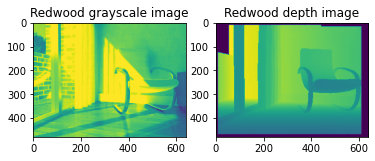

In [59]:
plt.subplot(1, 2, 1)
plt.title('Redwood grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Redwood depth image')
plt.imshow(rgbd_image.depth)
plt.show()
